In [96]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import cv2
import time


In [97]:
train_dataset_path='/content/drive/MyDrive/Train'
width=height=224
batch_size=32

idg=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.8,1.2),
    zoom_range=0.1,
    shear_range=0.3,
    rotation_range=10,
    validation_split=0.2

)

train_data=idg.flow_from_directory(
    train_dataset_path,
    target_size=(width,height),
    class_mode='categorical',
    batch_size=batch_size,
    subset='training',
    
)
val_data=idg.flow_from_directory(
    train_dataset_path,
    target_size=(width,height),
    class_mode='categorical',
    batch_size=batch_size,
    subset='validation',
    
)

Found 884 images belonging to 17 classes.
Found 204 images belonging to 17 classes.


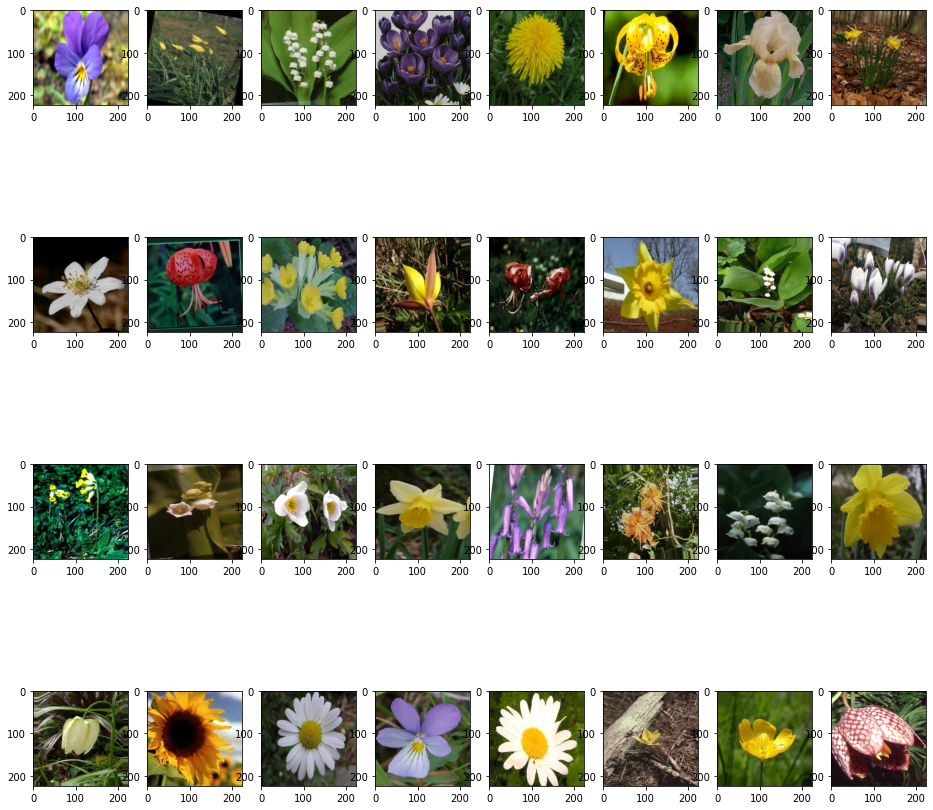

In [98]:
some_images=next(train_data)
X=some_images[0]
Y=some_images[1]

plt.figure(figsize=(16,16))
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(X[i])

In [115]:
base_model=tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(width,height,3),

)

In [116]:
for layer in base_model.layers[:-4]:
    layer.trainable=False
  

In [125]:
model=tf.keras.models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(1024,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(17,activation='softmax')
]
    
)


In [126]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 25088)             0         
                                                                 
 dense_30 (Dense)            (None, 1024)              25691136  
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_31 (Dense)            (None, 17)                17425     
                                                                 
Total params: 40,423,249
Trainable params: 32,787,985
Non-trainable params: 7,635,264
_________________________________________________________________


In [127]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [128]:
output=model.fit(train_data,validation_data=val_data,epochs=20)

Epoch 1/20
28/28 [==============================] - 22s 764ms/step - loss: 2.1837 - accuracy: 0.3552 - val_loss: 0.9915 - val_accuracy: 0.6961
Epoch 2/20
28/28 [==============================] - 21s 740ms/step - loss: 0.8344 - accuracy: 0.7466 - val_loss: 0.4801 - val_accuracy: 0.8480
Epoch 3/20
28/28 [==============================] - 21s 733ms/step - loss: 0.4413 - accuracy: 0.8744 - val_loss: 0.5774 - val_accuracy: 0.8480
Epoch 4/20
28/28 [==============================] - 21s 734ms/step - loss: 0.2380 - accuracy: 0.9231 - val_loss: 0.4551 - val_accuracy: 0.8676
Epoch 5/20
28/28 [==============================] - 21s 747ms/step - loss: 0.2270 - accuracy: 0.9321 - val_loss: 0.2072 - val_accuracy: 0.9363
Epoch 6/20
28/28 [==============================] - 21s 737ms/step - loss: 0.1691 - accuracy: 0.9559 - val_loss: 0.3163 - val_accuracy: 0.9069
Epoch 7/20
28/28 [==============================] - 21s 734ms/step - loss: 0.1248 - accuracy: 0.9717 - val_loss: 0.5281 - val_accuracy: 0.8676

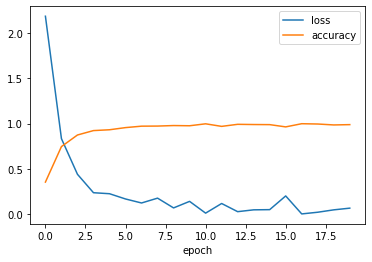

In [129]:


plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()



In [130]:
test_dataset_path='/content/drive/MyDrive/Test'
width=height=224
batch_size=32

idg=ImageDataGenerator(
    rescale=1./255,
  

)

test_data=idg.flow_from_directory(
    test_dataset_path,
    target_size=(width,height),
    class_mode='categorical',
    batch_size=batch_size,
   
    
)

Found 272 images belonging to 17 classes.


In [131]:
model.evaluate(test_data)

9/9 [==============================] - 2s 225ms/step - loss: 1.0659 - accuracy: 0.8272


[1.0658910274505615, 0.8272058963775635]

In [132]:
image=cv2.imread('/content/sunflower.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.resize(image,(width,height))
image=image/255.0
image=image.reshape(1,width,height,3)

start_time=time.time()
result=model.predict(image)
end_time=time.time()

print(np.argmax(result))
print(end_time-start_time)

9
0.16146016120910645
